<a href="https://colab.research.google.com/github/ankitashinde1211/Sentiment-Analysis-Assignment-/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> NLP Sentiment Analysis for Customer Feedback

## 1.Problem Statement - 

 **This is an add-on project for a client that wants to learn about their customers' sentiments through feedback and ratings in order to retain them and enhance their services to fulfil their needs.

## 2.Importing Library for data gathering and EDA

In [ ]:
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Collecting Data

In [ ]:
nlp_raw_data = pd.read_csv('/content/data_sentiment_headphone.csv')
nlp_raw_data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
nlp_raw_data.tail()

,review,rating
19947,GoodREAD MORE,5
19948,Everything is amazimg but the built is very li...,5
19949,GoodREAD MORE,5
19950,Best headphone i have ever used....READ MORE,5
19951,NiceREAD MORE,5


In [ ]:
nlp_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19952 entries, 0 to 19951
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  19952 non-null  object
 1   rating  19952 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 311.9+ KB


In [ ]:
nlp_raw_data.isna().sum()

review    0
rating    0
dtype: int64

In [ ]:
nlp_raw_data.shape

(19952, 2)

<Axes: xlabel='rating', ylabel='count'>

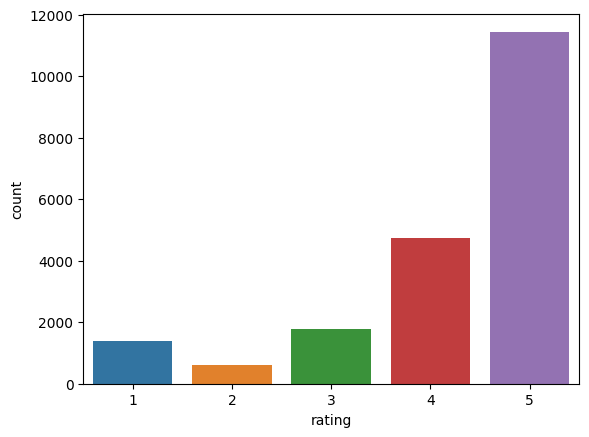

In [ ]:
sns.countplot(data=nlp_raw_data, x="rating")

In [ ]:
nlp_raw_data.rating.value_counts()

5    11452
4     4730
3     1768
1     1382
2      620
Name: rating, dtype: int64

#### Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(nlp_raw_data.review,nlp_raw_data.rating,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

17167                     Fabulous worth of pennyREAD MORE
4702                                         GoodREAD MORE
1707     the product is good but the delivery was too l...
254      This is what I wanted. I got it @INR 999. I am...
11761    It has issue in connectivity, it doesn't play ...
Name: review, dtype: object

In [ ]:
y_train.head()

17167    5
4702     4
1707     4
254      3
11761    1
Name: rating, dtype: int64

#### Tokenization

In [ ]:
# tokenization
def tokenization(data):
    tokens = word_tokenize(data)
    return tokens

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
x_train_token = X_train.apply(tokenization)
x_test_token =X_test.apply(tokenization)

In [ ]:
x_train_token.head()

17167               [Fabulous, worth, of, pennyREAD, MORE]
4702                                      [GoodREAD, MORE]
1707     [the, product, is, good, but, the, delivery, w...
254      [This, is, what, I, wanted, ., I, got, it, @, ...
11761    [It, has, issue, in, connectivity, ,, it, does...
Name: review, dtype: object

In [ ]:
x_test_token.head()

6757     [It, is, very, good, product, but, the, bass, ...
13197                                  [Nice, 👌READ, MORE]
15949          [Nice, product, at, good, price.READ, MORE]
19533    [I, liked, the, sound, quality, but, it, does,...
6491     [The, product, is, awesome, but, make, the, pr...
Name: review, dtype: object

#### Remove Punctuation

In [ ]:
def remove_punctuation(data):
    clean_text = [x for x in data if x.isalpha()]
    return clean_text

In [ ]:
x_train_without_punt = x_train_token.apply(remove_punctuation)
x_test_without_punt = x_test_token.apply(remove_punctuation)

In [ ]:
x_train_without_punt.head()

17167               [Fabulous, worth, of, pennyREAD, MORE]
4702                                      [GoodREAD, MORE]
1707     [the, product, is, good, but, the, delivery, w...
254      [This, is, what, I, wanted, I, got, it, INR, I...
11761    [It, has, issue, in, connectivity, it, does, p...
Name: review, dtype: object

#### Normalization

In [ ]:
def normalization(data):
    lower = [x.lower() for x in data]
    return lower

In [ ]:
x_train_normal = x_train_without_punt.apply(normalization)
x_test_normal = x_test_without_punt.apply(normalization)

In [ ]:
x_train_normal.head()

17167               [fabulous, worth, of, pennyread, more]
4702                                      [goodread, more]
1707     [the, product, is, good, but, the, delivery, w...
254      [this, is, what, i, wanted, i, got, it, inr, i...
11761    [it, has, issue, in, connectivity, it, does, p...
Name: review, dtype: object

#### Stopwords Removal

In [ ]:
domain_stop_w = ["headphone", 'delivery', 'delivered','product','voice']
def stopwords_remove(data):
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    clean_text = [x for x in data if x not in stop and x not in domain_stop_w]
    return clean_text 

In [ ]:
x_train1= x_train_normal.apply(stopwords_remove)
x_test1= x_test_normal.apply(stopwords_remove)

In [ ]:
x_train1.head()

17167                         [fabulous, worth, pennyread]
4702                                            [goodread]
1707     [good, late, found, days, ordered, give, stars...
254      [wanted, got, inr, seriously, loving, boat, te...
11761                          [issue, connectivity, play]
Name: review, dtype: object

In [ ]:
x_test1.head()

6757     [good, bass, high, build, quality, good, ur, b...
13197                                               [nice]
15949                                         [nice, good]
19533    [liked, sound, quality, sit, well, ear, little...
6491     [awesome, make, comfortable, stretchable, make...
Name: review, dtype: object

#### Lemmatiazation

In [ ]:
def lemmatization(data):
    from nltk.stem import WordNetLemmatizer
    lemma = WordNetLemmatizer()
    l1 = []
    for i in data :
        text1 = lemma.lemmatize(i)
        l1.append(text1)
    return l1

In [ ]:
final_train = x_train1.apply(lemmatization)
final_test = x_test1.apply(lemmatization)

In [ ]:
final_train.head()

17167                         [fabulous, worth, pennyread]
4702                                            [goodread]
1707     [good, late, found, day, ordered, give, star, ...
254      [wanted, got, inr, seriously, loving, boat, te...
11761                          [issue, connectivity, play]
Name: review, dtype: object

In [ ]:
final_test.head()

6757     [good, bass, high, build, quality, good, ur, b...
13197                                               [nice]
15949                                         [nice, good]
19533    [liked, sound, quality, sit, well, ear, little...
6491     [awesome, make, comfortable, stretchable, make...
Name: review, dtype: object

### World Cloud

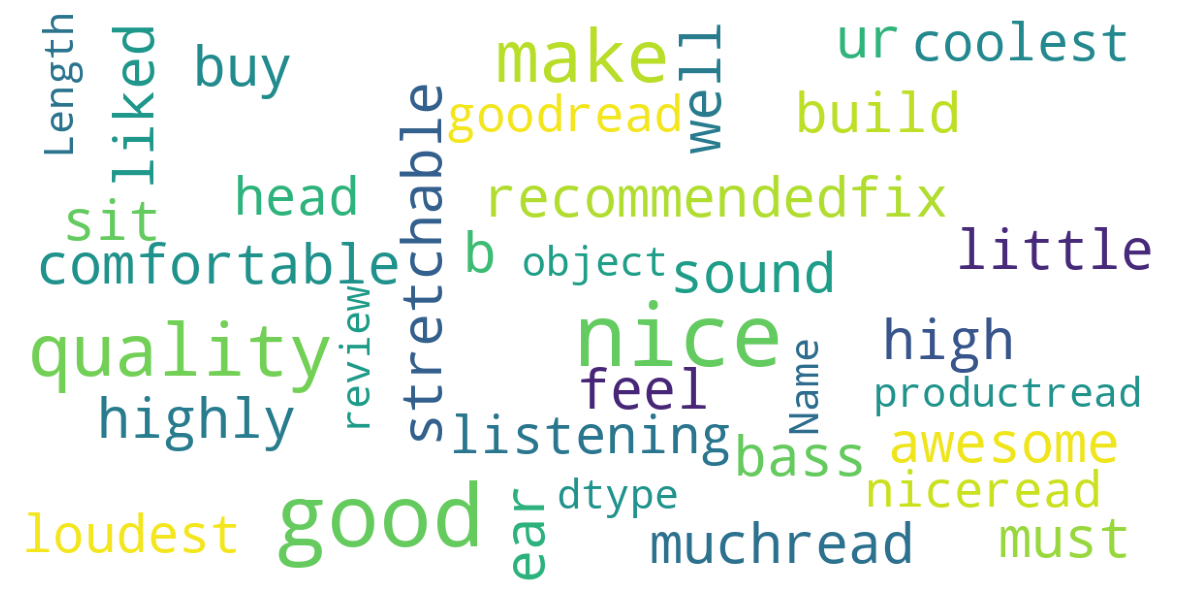

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud= WordCloud(background_color='white',stopwords=stopwords,max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1,figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(final_test)

#### Joining Words

In [ ]:
def join_list(data):
    text = " ".join(data)
    return text

In [ ]:
final_text_train = final_train.apply(join_list)
final_text_test = final_test.apply(join_list)

In [ ]:
final_text_train

17167                             fabulous worth pennyread
4702                                              goodread
1707     good late found day ordered give star headphon...
254      wanted got inr seriously loving boat team done...
11761                              issue connectivity play
                               ...                        
11284    nice productsound amazing battery back also go...
11964                                happy buy bb daysread
5390                                              niceread
860      value money good think connectivity good bluet...
15795                                best headset thisread
Name: review, Length: 15961, dtype: object

In [ ]:
final_text_test

6757     good bass high build quality good ur budget hi...
13197                                                 nice
15949                                            nice good
19533    liked sound quality sit well ear little bit di...
6491     awesome make comfortable stretchable make pres...
                               ...                        
9809               must buy highly recommendedfix muchread
13935    feel like listening coolest loudest headphone ...
9594                                              goodread
14720                                             niceread
9143                                      nice productread
Name: review, Length: 3991, dtype: object

## 1. CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',max_df=0.95,max_features=1200)
count_train = cv.fit_transform(final_text_train)
count_test = cv.transform(final_text_test)

#### final DF for analysis

In [ ]:
df = pd.DataFrame(count_train.A)

In [ ]:
df.head()

,able,absolutely,accessory,according,actually,add,adjust,adjustable,adjusted,adjustment,...,wrong,wrost,yeah,year,yes,yesterday,youread,youtube,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(15961, 1200)

## Model Building

#### Naive Bayes - MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
mnb_model = MultinomialNB()
mnb_model.fit(count_train.A,y_train)
pred_mnb = mnb_model.predict(count_test.A)

In [ ]:
pred_mnb

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
report = classification_report(y_test,pred_mnb)
print(report)

              precision    recall  f1-score   support

           1       0.65      0.62      0.63       265
           2       0.58      0.18      0.27       123
           3       0.46      0.29      0.35       375
           4       0.47      0.28      0.35       932
           5       0.72      0.91      0.80      2296

    accuracy                           0.66      3991
   macro avg       0.57      0.45      0.48      3991
weighted avg       0.63      0.66      0.63      3991

